## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/happygirl/Data Analytics - Immersion/achivement 6'

In [6]:
df = pd.read_csv(os.path.join(path, 'Boat Sales Analysis', '02 Data', 'Original Data', 'boat_data.csv'))

### 2. Data cleaning

In [7]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [8]:
df.head(20)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


In [10]:
# Display information about data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [1]:
shape=df.shape
print('Rows : ',shape[0])
print('Columns : ',shape[1])

NameError: name 'df' is not defined

##### Structuring

In [11]:
#Split Price to 'currency','Price'
df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)
df.head()

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/2243633011.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [12]:
df['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [13]:
def eurprice(Price,currency):
    if currency=='EUR':
        return Price
    elif currency=='CHF':
        return int(Price) * 1.02
    elif currency=='DKK':
        return int(Price) * 0.13
    elif currency=='Â£':
        return int(Price) * 1.17
df['EUR_price'] = df.apply(lambda x: eurprice(x.Price, x.currency), axis=1)


In [14]:
#Split Location to 'Country.abs,'City','Other'
df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)
df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/1773712652.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/1773712652.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)


In [15]:
df_Structuring = df.drop(['Location','currency','Price','Other'],axis=1)
df_Structuring.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.4,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


##### Cleaning

In [16]:
df_Structuring.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
EUR_price                         0
Country                          36
City                            943
dtype: int64

In [17]:
df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)
df_Structuring = df_Structuring.drop(['Boat Type1'],axis=1)

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/2578816233.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)


In [18]:
# fill Null in "Type"
df_Structuring['Type'].fillna(df_Structuring['Type'].value_counts().idxmax(),inplace=True)

In [19]:
import matplotlib.pyplot as plt

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/3851991545.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Structuring.Length)
/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/3851991545.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Structuring.Widt

Text(0.5, 1.0, 'Width Distribution')

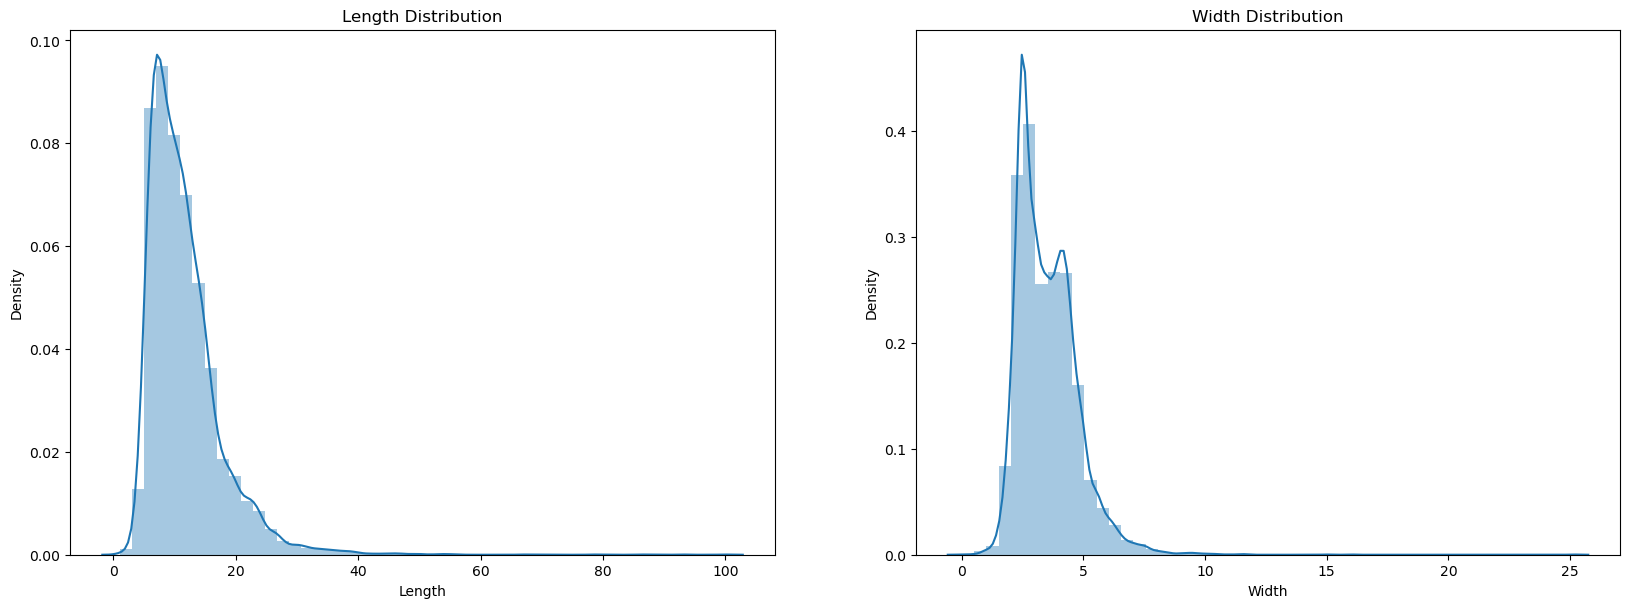

In [20]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_Structuring.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df_Structuring.Width)
ax2.set_title("Width Distribution")

In [21]:
df_Structuring['Width'].fillna(df_Structuring['Width'].median(),inplace=True)
df_Structuring['Length'].fillna(df_Structuring['Length'].median(),inplace=True)

In [22]:
# fill Null in "Material"
df_Structuring['Material'].fillna(df_Structuring['Material'].value_counts().idxmax(),inplace=True)

##### Duplicates check

In [23]:
df_Structuring.duplicated().sum()

0

In [25]:
dups = df.duplicated()

In [26]:
dups.shape # No dups

(9888,)

In [27]:
df_Cleaning = df_Structuring.dropna(subset=['Manufacturer','Country'])

In [28]:
df_Structuring['Manufacturer'].fillna('None',inplace=True)
df_Structuring['Country'].fillna('None',inplace=True)
df_Structuring['City'].fillna('None',inplace=True)
df_Structuring.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [29]:
df_Cleaning['City'].fillna('None',inplace=True)
df_Cleaning.isna().sum()

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/1191000463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaning['City'].fillna('None',inplace=True)


Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [30]:
print('Befor Clean :' ,df_Structuring.shape)
print('After Clean :' ,df_Cleaning.shape)

Befor Clean : (9888, 11)
After Clean : (8521, 11)


In [31]:
df_Cleaning.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                       object
Country                         object
City                            object
dtype: object

In [32]:
df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_9291/4026246842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)


##### Extreme values checks

In [34]:
df_Cleaning.describe()

,Year Built,Length,Width,Number of views last 7 days,EUR_price
count,8521.000000,8521.000000,8521.000000,8521.000000,8.521000e+03
mean,1889.648398,11.169475,3.460122,153.545241,3.006513e+05
std,471.470345,5.345653,1.169778,157.921003,9.701562e+05
min,0.000000,1.700000,0.740000,13.000000,3.300000e+03
25%,1999.000000,7.300000,2.540000,71.000000,4.429000e+04
50%,2008.000000,9.990000,3.270000,110.000000,9.500000e+04
75%,2018.000000,13.680000,4.200000,177.000000,2.500000e+05
max,2021.000000,56.000000,25.160000,3263.000000,3.100000e+07


In [35]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


### 3. Data prep for regression analysis 

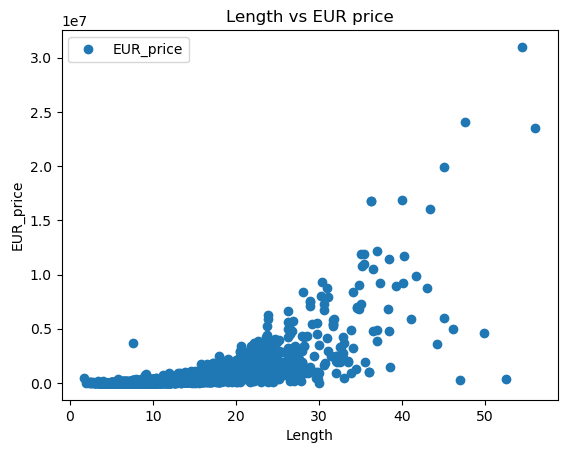

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_Cleaning.plot(x = 'Length', y='EUR_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length vs EUR price')  
plt.xlabel('Length')  
plt.ylabel('EUR_price')  
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_Cleaning['Length'].values.reshape(-1,1)
y = df_Cleaning['EUR_price'].values.reshape(-1,1)

In [18]:
X

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [19]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [41]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

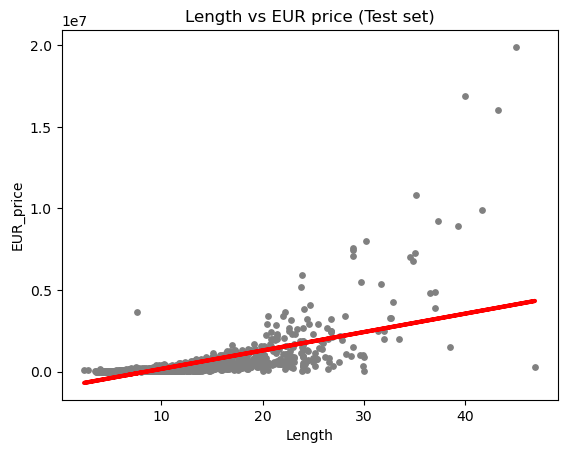

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs EUR price (Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('EUR_price')
plot_test.show()

The line fits the data, indicating a linear relationship between the variables.

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[112780.03601058]]
Mean squared error:  532963130829.8142
R2 score:  0.39779492435976094


In [47]:
y_predicted

array([[ -70559.09639217],
       [-150632.92195968],
       [  58010.14465989],
       ...,
       [ 697472.9488399 ],
       [ 597098.71679048],
       [-196872.73672402]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,17340.00,-7.055910e+04
1,73440.00,-1.506329e+05
2,34900.00,5.801014e+04
3,23990.00,-1.224379e+05
4,3855.60,-5.510020e+05
5,13500.00,-8.296490e+04
6,266025.18,7.605495e+04
7,36720.00,-5.476989e+04
8,169000.00,2.610142e+05
9,90000.00,3.545414e+04


##### Compare how the regression fits the training set

The R2 score for the model is 0.39, meaning that isn’t that great of a fit. The actual and predicted dataframe of price shows also variance, therefore showing that the model is innacurate.

In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[112780.03601058]]
Mean squared error:  607305408458.4415
R2 score:  0.3707038180074915


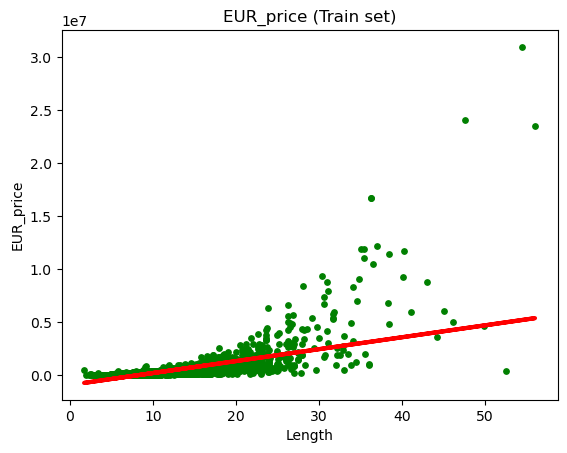

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('EUR_price (Train set)')
plot_test.xlabel('Length')
plot_test.ylabel('EUR_price')
plot_test.show()

##### Compare how the regression fits the training set

The R2 score for the model is 0.37, meaning that isn’t that great of a fit.